<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.189264,69.467236,0.800352,102.456852,101.959102,0.497750
1,0.0,1.0,85.686989,98.117423,0.420522,194.224933,194.125733,0.099200
2,0.0,2.0,70.835478,90.436667,0.761899,172.034044,171.579220,0.454824
3,0.0,3.0,66.830898,64.422651,-0.812942,140.440607,141.315621,-0.875014
4,0.0,4.0,78.900123,56.782701,-0.547368,145.135456,145.616652,-0.481196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.635560,95.036640,1.460252,168.132452,166.631025,1.501427
19996,999.0,16.0,51.874656,94.583156,-1.285835,155.171977,156.446963,-1.274986
19997,999.0,17.0,89.160758,91.534127,0.410639,191.105524,190.553704,0.551820
19998,999.0,18.0,88.809759,34.920403,-0.463621,133.266541,133.418586,-0.152045


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.189264,69.467236,0.800352,102.456852,101.959102,0.497750
1,0.0,1.0,85.686989,98.117423,0.420522,194.224933,194.125733,0.099200
2,0.0,2.0,70.835478,90.436667,0.761899,172.034044,171.579220,0.454824
3,0.0,3.0,66.830898,64.422651,-0.812942,140.440607,141.315621,-0.875014
4,0.0,4.0,78.900123,56.782701,-0.547368,145.135456,145.616652,-0.481196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.635560,95.036640,1.460252,168.132452,166.631025,1.501427
19996,999.0,16.0,51.874656,94.583156,-1.285835,155.171977,156.446963,-1.274986
19997,999.0,17.0,89.160758,91.534127,0.410639,191.105524,190.553704,0.551820
19998,999.0,18.0,88.809759,34.920403,-0.463621,133.266541,133.418586,-0.152045


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.189264  69.467236  0.800352  102.456852  101.959102  0.497750
      1.0    85.686989  98.117423  0.420522  194.224933  194.125733  0.099200
      2.0    70.835478  90.436667  0.761899  172.034044  171.579220  0.454824
      3.0    66.830898  64.422651 -0.812942  140.440607  141.315621 -0.875014
      4.0    78.900123  56.782701 -0.547368  145.135456  145.616652 -0.481196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.635560  95.036640  1.460252  168.132452  166.631025  1.501427
      16.0   51.874656  94.583156 -1.285835  155.171977  156.446963 -1.274986
      17.0   89.160758  91.534127  0.410639  191.105524  190.553704  0.551820
      18.0   88.809759  34.920403 -0.463621  133.266541  133.418586 -0.152045
      19.0   27.796045  43.783495  0.583096   82.162636   81.492972  0.669664

[20000 rows x 6 columns]

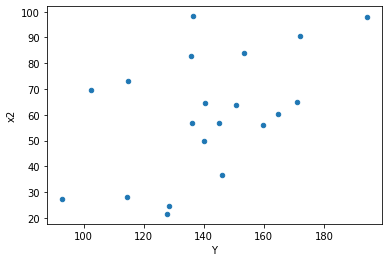

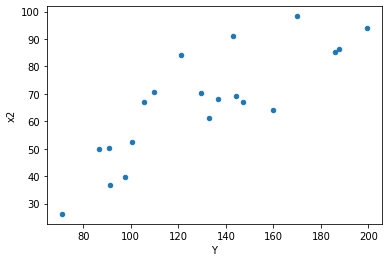

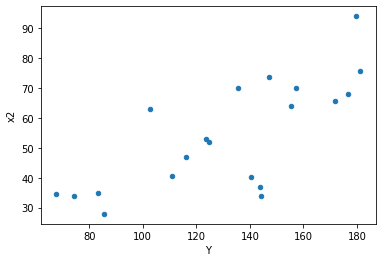

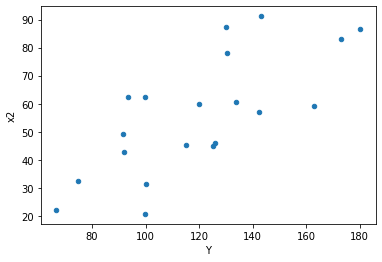

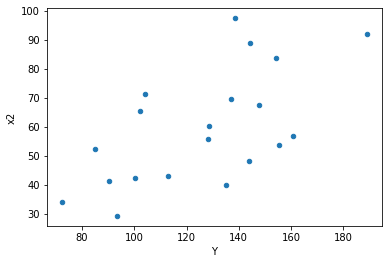

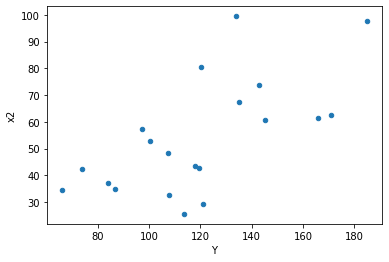

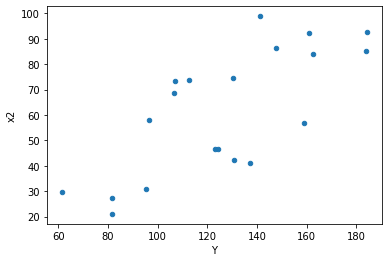

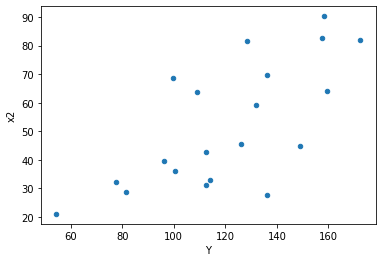

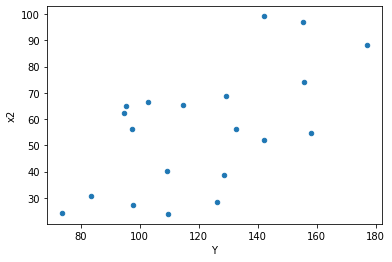

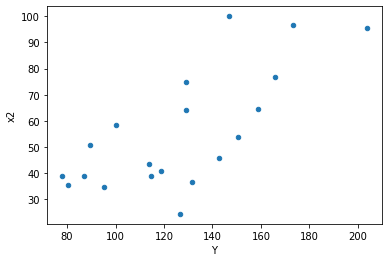

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,9.0,1.946569451989678,3.498609620786436,0.2780813502842397,0.388734402309604,1.397916120272937,0.6257003981135285,0.6871498009432357,0.31285019905676426,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,2.573618397932125,5.453360157021548,0.28595759977023616,0.7790514510030783,2.7243600157122514,0.20005069330190972,0.8999746533490451,0.10002534665095486,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,2.0834015995165767,10.27196739108386,0.29762879993093955,1.141329710120429,3.834742170063038,0.06523465298643605,0.967382673506782,0.032617326493218024,Reject001=1 : Homoscedasticity
5.0,11.0,5.0,2.7374861978708953,2.4154343622798646,0.24886238162462684,0.4830868724559729,1.9411807815318591,0.4801755778373884,0.7599122110813058,0.2400877889186942,Reject001=1 : Homoscedasticity
9.0,9.0,7.0,2.671336009386379,5.315148241862432,0.2968151121540421,0.7593068916946332,2.5581813748774542,0.22892546361652677,0.8855372681917366,0.11446273180826338,Reject001=1 : Homoscedasticity
11.0,4.0,12.0,0.9149418452847713,4.7594464568408545,0.22873546132119282,0.3966205380700712,1.733970481792206,0.4142297413853926,0.7928851293073037,0.2071148706926963,Reject001=1 : Homoscedasticity
12.0,12.0,4.0,4.960920987098582,3.5616340450734363,0.4134100822582152,0.8904085112683591,2.153814213733209,0.47826535633358347,0.7608673218332083,0.23913267816679173,Reject001=1 : Homoscedasticity
13.0,2.0,14.0,0.3967332454674485,6.790342176917376,0.19836662273372424,0.485024441208384,2.445090986196062,0.2456253883568169,0.8771873058215915,0.12281269417840845,Reject001=1 : Homoscedasticity
14.0,6.0,10.0,4.496303013829812,7.773508516436013,0.749383835638302,0.7773508516436013,1.037320015024714,0.9120136146340312,0.5439931926829844,0.4560068073170156,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,1.946569451989678,3.498609620786436,0.2780813502842397,0.388734402309604,1.397916120272937,0.6257003981135285,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,2.573618397932125,5.453360157021548,0.28595759977023616,0.7790514510030783,2.7243600157122514,0.20005069330190972,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,2.0834015995165767,10.27196739108386,0.29762879993093955,1.141329710120429,3.834742170063038,0.06523465298643605,Reject001=1 : Homoscedasticity
3.0,9.0,7.0,7.983450705561121,2.4985324614715188,0.8870500783956801,0.35693320878164553,0.4023822526764164,0.20382704272225027,Reject001=1 : Homoscedasticity
4.0,10.0,6.0,3.8325500191143287,1.5264422356933074,0.38325500191143286,0.2544070392822179,0.6638061812980834,0.5400565185526411,Reject001=1 : Homoscedasticity
5.0,11.0,5.0,2.7374861978708953,2.4154343622798646,0.24886238162462684,0.4830868724559729,1.9411807815318591,0.4801755778373884,Reject001=1 : Homoscedasticity
6.0,10.0,6.0,4.057753601118115,1.1249702269307607,0.40577536011181153,0.18749503782179344,0.462066099257799,0.2684701276873178,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,2.5252540692529912,1.0310821979912346,0.3156567586566239,0.12888527474890432,0.40830830075495905,0.22670927758961323,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,2.967418527023225,2.1492574037997096,0.3709273158779031,0.2686571754749637,0.7242852277921659,0.6590237634849557,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      926
Reject001=0 : Heteroscedasticity     74
Name: Result_test, dtype: int64